# Video Game Data Analysis

The video game industry is massive and complex. It is a multi-billion dollar industry that generates immense revenue and provides technological innovation in the form of entertainment. In the world of science, video games are being used as tools for research, increasingly as a means of studying human behaviour, simulations (for example pandemics) and even camouflage evolution. With this in mind, a large industry would be interested in the parameters that make a successful video game. What platforms are successful, what genres are successful and the links between good sales and good review scores.

The scope of this analysis wil be limited to the top selling video games of all time by the company Nintendo who are known for publishing and developing some of the biggest multimedia franchises of all time including The Legend of Zelda, Pokemon and Mario. The aim is to breakdown video game sales success. What makes a successful video game? Is it the genre, the platform or something else? 

This analysis is therefore aimed at attempting to elucidate some of these questions. Combining two datasets, one of video game sales and one of their review scores to do so.

In [75]:
# This code imports libraries I need to start
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # Warnings are imported to disable some warnings which I could not solve and do not
# impact the results. Not best practice but the warnings are repeated 60 times for iterative processes
# when looking for optimal hyperparameters.

In [76]:
warnings.filterwarnings("ignore") # This disables the warnings

## Cleaning the Data

In [77]:
data = pd.read_csv("List-of-best-selling-videogames.csv") # Read in video game sales data

In [78]:
data['Game'] = data['Game'].apply(lambda x: str(x).replace(u'\xa0', u' ')) # some game titles,
# upon inspection, have \xa0 in the string, this is code for non-breaking space
# may cause issues down the line, so removing them.

In [79]:
# Need to standardise console platform names for merging with score dataframe later
# Each line of code searches for the string listed in string.contains() at the location of the platform column,
# specified as the data.loc[data['column_name']]. 
# It then replaces that with the string on the right of the = sign and puts it into the platform column which is
# specified after the string.contains().
data.loc[data['Platform'].str.contains('Game Boy Advanced'), 'Platform'] = 'GameBoyAdvance'
data.loc[data['Platform'].str.contains('Nintendo DS'), 'Platform'] = 'DS'
data.loc[data['Platform'].str.contains('Nintendo 3DS'), 'Platform'] = '3DS'
data.loc[data['Platform'].str.contains('Nintendo Switch'), 'Platform'] = 'Switch'
data.loc[data['Platform'].str.contains('Nintendo 64'), 'Platform'] = 'N64'

In [80]:
# List consoles of interest to subset the data frame with
# NES data ignored as it contains SNES games which is a separate console and therefore should be separated.
# Since it isn't they are taken out.
nintendo_consoles = ["N64", "Wii", "Switch", "DS", "Wii U", "3DS", "Game Boy Advance", "GameCube"]

In [81]:
# Subset the dataframe with consoles of interest
data = data[data["Platform"].isin(nintendo_consoles)]

In [82]:
# Check data, note row number: 381 rows
data

,Game,Developer,Publisher,Release date,Sales,Platform,Genre,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
49,Super Mario 64,Nintendo EAD,Nintendo,"June 23, 1996",11910000,N64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Mario Kart 64,Nintendo EAD,Nintendo,"December 14, 1996",9870000,N64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,GoldenEye 007,Rare,Nintendo,"August 25, 1997",8090000,N64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,The Legend of Zelda: Ocarina of Time,Nintendo EAD,Nintendo,"November 21, 1998",7600000,N64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Super Smash Bros.,HAL Laboratory,Nintendo,"January 21, 1999",5550000,N64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Fitness Boxing,Imagineer,"JP: Imagineer, NA/PAL: Nintendo","December 20, 2018",1000000,Switch,"Exergame, rhythm",NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,Fitness Boxing 2: Rhythm and Exercise,Imagineer,"JP: Imagineer, NA/PAL: Nintendo","December 4, 2020",1000000,Switch,"Exergame, rhythm",NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,Shin Megami Tensei V,Atlus,"JP: Atlus, NA: Sega, PAL: Nintendo","November 11, 2021",1000000,Switch,Role-playing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,Story of Seasons: Pioneers of Olive Town,Marvelous,Xseed Games,"February 25, 2021",1000000,Switch,"Simulation, role-playing",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Scores data frame
scores = pd.read_csv("all_games.csv", skipinitialspace=True) # Read in metacritic scores

# There are multi platform releases that may cause issue down the line, so going to remove those

In [84]:
# Check unique platforms
scores.loc[scores['platform'].str.contains('Nintendo 64'), 'platform'] = 'N64'
scores["platform"].unique()

array(['N64', 'PlayStation', 'PlayStation 3', 'Dreamcast', 'Xbox 360',
       'Wii', 'Xbox One', 'PC', 'Switch', 'PlayStation 2',
       'PlayStation 4', 'GameCube', 'Xbox', 'Wii U', 'Game Boy Advance',
       '3DS', 'Xbox Series X', 'DS', 'PlayStation Vita', 'PlayStation 5',
       'PSP', 'Stadia'], dtype=object)

In [85]:
# Subset them to only those of interest, variable on the right contains only the consoles in the 'platform' column
# that are in (isin) nintendo_consoles created earlier
scores_nintendo = scores[scores["platform"].isin(nintendo_consoles)]
scores_nintendo

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,N64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
5,Super Mario Galaxy,Wii,"November 12, 2007",[Metacritic's 2007 Wii Game of the Year] The u...,97,9.1
6,Super Mario Galaxy 2,Wii,"May 23, 2010","Super Mario Galaxy 2, the sequel to the galaxy...",97,9.1
13,The Legend of Zelda: Breath of the Wild,Switch,"March 3, 2017",Forget everything you know about The Legend of...,97,8.7
15,Perfect Dark,N64,"May 22, 2000",Step into the Dark... As Carrington Institute'...,97,8.8
...,...,...,...,...,...,...
18782,Cruis'n,Wii,"November 27, 2007",An all new version of the classic Midway arcad...,25,4.0
18787,Game Party Champions,Wii U,"November 18, 2012",Game Party Champions is the fifth and latest i...,24,3.2
18788,Legends of Wrestling II,Game Boy Advance,"November 25, 2002",Legends of Wrestling II takes you through the ...,24,3.6
18792,Homie Rollerz,DS,"March 5, 2008","Homie Rollerz is a fast-paced, mayhem-laden ka...",23,3.0


In [86]:
# Combine the two dataframes by using the video game name and platform.
# The merge function achieves this, I am using data as the base, within the brackets
# the dataset scores_nintendo is used and the column names are specified for both dataframes.
# how = 'right' to say add the scores_nintendo dataframe to the right of the data dataframe.
# New dataframe is named data_merge.
data_merge = data.merge(scores_nintendo, left_on=["Game", "Platform"], right_on=["name", "platform"], how = "right", indicator = True)
data_merge

,Game,Developer,Publisher,Release date,Sales,Platform,Genre,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,name,platform,release_date,summary,meta_score,user_review,_merge
0,The Legend of Zelda: Ocarina of Time,Nintendo EAD,Nintendo,"November 21, 1998",7600000.0,N64,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,The Legend of Zelda: Ocarina of Time,N64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,both
1,Super Mario Galaxy,Nintendo EAD (Group 1),Nintendo,"November 1, 2007",12800000.0,Wii,Platform,NaN,NaN,NaN,...,NaN,NaN,NaN,Super Mario Galaxy,Wii,"November 12, 2007",[Metacritic's 2007 Wii Game of the Year] The u...,97,9.1,both
2,Super Mario Galaxy 2,Nintendo EAD (Group 1),Nintendo,"May 23, 2010",7410000.0,Wii,Platform,NaN,NaN,NaN,...,NaN,NaN,NaN,Super Mario Galaxy 2,Wii,"May 23, 2010","Super Mario Galaxy 2, the sequel to the galaxy...",97,9.1,both
3,The Legend of Zelda: Breath of the Wild,Nintendo EPD,Nintendo,"March 3, 2017",26550000.0,Switch,Action-adventure,NaN,NaN,NaN,...,NaN,NaN,NaN,The Legend of Zelda: Breath of the Wild,Switch,"March 3, 2017",Forget everything you know about The Legend of...,97,8.7,both
4,Perfect Dark,Rare,Rare,"May 22, 2000",2520000.0,N64,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Perfect Dark,N64,"May 22, 2000",Step into the Dark... As Carrington Institute'...,97,8.8,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Cruis'n,Wii,"November 27, 2007",An all new version of the classic Midway arcad...,25,4.0,right_only
4307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Game Party Champions,Wii U,"November 18, 2012",Game Party Champions is the fifth and latest i...,24,3.2,right_only
4308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Legends of Wrestling II,Game Boy Advance,"November 25, 2002",Legends of Wrestling II takes you through the ...,24,3.6,right_only
4309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Homie Rollerz,DS,"March 5, 2008","Homie Rollerz is a fast-paced, mayhem-laden ka...",23,3.0,right_only


In [87]:
# Lots of redundant data in metacritic scores so remove these using dropna on the game name
# Now only includes the metacritic scores for the nintendo games to be analysed
data_merge = data_merge.dropna(subset=["Game"]).reset_index()

In [88]:
# Delete unused columns in the dataset
# Use for loop to iterate over the columns that are unused and remove them
for i in range(7,14): # define range of i as between 7 and 14 (it will stop at 13 because python takes the n+1 value of where you want to stop
    col = "Unnamed: " + str(i) # makes an iterative string 'Unnamed: 7' to 'Unnamed: 13'
    del data_merge[col] # Removes the columns
data_merge

,index,Game,Developer,Publisher,Release date,Sales,Platform,Genre,name,platform,release_date,summary,meta_score,user_review,_merge
0,0,The Legend of Zelda: Ocarina of Time,Nintendo EAD,Nintendo,"November 21, 1998",7600000.0,N64,NaN,The Legend of Zelda: Ocarina of Time,N64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,both
1,1,Super Mario Galaxy,Nintendo EAD (Group 1),Nintendo,"November 1, 2007",12800000.0,Wii,Platform,Super Mario Galaxy,Wii,"November 12, 2007",[Metacritic's 2007 Wii Game of the Year] The u...,97,9.1,both
2,2,Super Mario Galaxy 2,Nintendo EAD (Group 1),Nintendo,"May 23, 2010",7410000.0,Wii,Platform,Super Mario Galaxy 2,Wii,"May 23, 2010","Super Mario Galaxy 2, the sequel to the galaxy...",97,9.1,both
3,3,The Legend of Zelda: Breath of the Wild,Nintendo EPD,Nintendo,"March 3, 2017",26550000.0,Switch,Action-adventure,The Legend of Zelda: Breath of the Wild,Switch,"March 3, 2017",Forget everything you know about The Legend of...,97,8.7,both
4,4,Perfect Dark,Rare,Rare,"May 22, 2000",2520000.0,N64,NaN,Perfect Dark,N64,"May 22, 2000",Step into the Dark... As Carrington Institute'...,97,8.8,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,3642,Wii Play,Nintendo EAD (Group 2),Nintendo,"December 2, 2006",28020000.0,Wii,Party,Wii Play,Wii,"February 12, 2007","In Wii Play, the star of the game is you. Crea...",58,6.6,both
221,3648,Mario Party: Island Tour,NDcube,Nintendo,"November 22, 2013",2930000.0,3DS,Party,Mario Party: Island Tour,3DS,"November 22, 2013","The game features seven different game boards,...",57,6.0,both
222,3669,"Hey You, Pikachu!",Ambrella,Nintendo,"December 12, 1998",1830000.0,N64,NaN,"Hey You, Pikachu!",N64,"November 5, 2000","For the first time ever, you can actually talk...",57,6.4,both
223,4293,Game Party 2,FarSight Studios,Midway Games,"October 6, 2008",1000000.0,Wii,Party,Game Party 2,Wii,"October 6, 2008","[Also known as ""More Game Party"" in the UK/EU]...",29,5.8,both


In [89]:
# The number of rows has dropped from the expected 381 to 251
# These are the games not transferred over as they did not have names and platforms matching in
# The scores dataset, looking at some of the titles such as pokemon diamond and pearl, this is because 
# they are two games that are aggregated together for sales data, but split apart for review scores.
# This may be the case for many of these titles, there may be other reasons too however, for the scope of this
# analysis, 251 data points is plenty, the effort it would take to recover the rest is not necessarily worth it.
# Moreover, it would be overly complicated and messy.
list(set(data["Game"]).difference(data_merge["Game"]))

['1080° Snowboarding',
 'Active Life: Outdoor Challenge',
 'WCW/nWo Revenge',
 'Brain Age 2: More Training in Minutes a Day!',
 'Sonic Adventure 2: Battle',
 'Pokémon Stadium ',
 'Resident Evil',
 'WCW vs. nWo: World Tour',
 'Just Dance',
 'New Pokémon Snap',
 "Dr Kawashima's Brain Training for Nintendo Switch",
 'Thief Simulator',
 'Inazuma Eleven: Firestorm and Blizzard',
 'Love and Berry DS Collection',
 'Pokémon Brilliant Diamond and Shining Pearl',
 'Nintendogs + Cats',
 'Resident Evil Zero',
 'Pokémon Colosseum',
 'Pokémon Legends: Arceus',
 "PokéPark Wii: Pikachu's Adventure",
 "High School Musical: Makin' the Cut!",
 'Kirby and the Forgotten Land',
 'Pokémon Ultra Sun and Ultra Moon',
 'English Training: Have Fun Improving Your Skills!',
 'Pokémon Mystery Dungeon: Explorers of Sky',
 'Big Beach Sports',
 'Star Wars: Shadows of the Empire',
 'Mario Party 2',
 'Donkey Kong 64 ',
 'Fire Emblem Awakening',
 'Fitness Boxing 2: Rhythm and Exercise',
 "Pokémon: Let's Go, Pikachu! and 

In [90]:
data_no_genre = data_merge[data_merge['Genre'].isna()]
len(data_no_genre)
# There are 26 games that do not have a defined genre, however, some franchises do not deviate
# from their genres. The legend of Zelda for instance is always an action adventure game.
# With this is in mind, I can add some genres into the dataset to increase the number of data points.
# This is a bit more worthwhile.

26

In [91]:
# This is the full list
data_no_genre

,index,Game,Developer,Publisher,Release date,Sales,Platform,Genre,name,platform,release_date,summary,meta_score,user_review,_merge
0,0,The Legend of Zelda: Ocarina of Time,Nintendo EAD,Nintendo,"November 21, 1998",7600000.0,N64,NaN,The Legend of Zelda: Ocarina of Time,N64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1,both
4,4,Perfect Dark,Rare,Rare,"May 22, 2000",2520000.0,N64,NaN,Perfect Dark,N64,"May 22, 2000",Step into the Dark... As Carrington Institute'...,97,8.8,both
10,15,The Legend of Zelda: Majora's Mask,Nintendo EAD,Nintendo,"April 27, 2000",3360000.0,N64,NaN,The Legend of Zelda: Majora's Mask,N64,"October 25, 2000",Thrown into a parallel world by the mischievou...,95,9.1,both
16,36,Paper Mario,Intelligent Systems,Nintendo,"August 11, 2000",1370000.0,N64,NaN,Paper Mario,N64,"February 5, 2001",Mario pals around in an all-new action adventu...,93,9.0,both
17,41,Banjo-Kazooie,Rare,Nintendo,"June 29, 1998",3650000.0,N64,NaN,Banjo-Kazooie,N64,"May 31, 1998",Trouble is brewing on Spiral Mountain! Gruntil...,92,9.1,both
20,51,Wave Race 64,Nintendo EAD,Nintendo,"September 27, 1996",2940000.0,N64,NaN,Wave Race 64,N64,"November 1, 1996",Wave Race 64 is sure to provide some of the mo...,92,8.3,both
24,68,Mario Tennis,Camelot Software Planning,Nintendo,"July 21, 2000",2320000.0,N64,NaN,Mario Tennis,N64,"August 28, 2000",All of your favorite characters hit the court ...,91,8.8,both
28,84,Mario Golf,Camelot Software Planning,Nintendo,"June 11, 1999",1470000.0,N64,NaN,Mario Golf,N64,"June 30, 1999",Forget buying expensive golf gear--Mario bring...,91,8.0,both
34,106,Banjo-Tooie,Rare,Nintendo,"November 20, 2000",3000000.0,N64,NaN,Banjo-Tooie,N64,"November 19, 2000","Two years after Banjo Kazooie, Banjo and the g...",90,8.8,both
42,140,WWF No Mercy,"AKI Corporation, Asmik Ace Entertainment",THQ,"November 17, 2000",1190000.0,N64,NaN,WWF No Mercy,N64,"November 17, 2000","Jump into the ring with the biggest, baddest j...",89,8.5,both


In [92]:
# These repeated lines of code change the related genres to the right ones for those games.
# Similar to before the str.contains() conatins where the row is that needs to be changed by searching for a string within
# a defined list of strings. For instance, it searches 'metroid' and 'Harry Potter' and 'The Legend of Zelda'
# and puts the genres where it finds those game names (by searching the game column) to the genre specified, in
# this case "Action-adventure". The | spearator allows me to give multiple strings for it to check, as long as the 
# r is put in front. The genre at the location of game is placed in the genre column.
data_merge.loc[data_merge['Game'].str.contains(r'The Legend of Zelda|Harry Potter|Metroid'), 'Genre'] = 'Action-adventure'
data_merge.loc[data_merge['Game'].str.contains(r'Paper Mario|Final Fantasy|Mario &|Golden Sun|Pikachu|Yu|Kingdom Hearts'), 'Genre'] = 'Role-Playing Game'
data_merge.loc[data_merge['Game'].str.contains(r'Super Mario|Banjo|Donkey|Kirby|Yoshi|Spyro|Wario Land|Sonic'), 'Genre'] = 'Platformer'
data_merge.loc[data_merge['Game'].str.contains(r'Wave Race|Mario Tennis|Mario Golf|WWF|bike'), 'Genre'] = 'Sport'
data_merge.loc[data_merge['Game'].str.contains(r'Racing|F-Zero|Kart'), 'Genre'] = 'Racing'
data_merge.loc[data_merge['Game'].str.contains(r'Star Fox|Perfect Dark|Turok|Jet|Rogue Squadron'), 'Genre'] = 'Shooter'
data_merge.loc[data_merge['Game'].str.contains(r'WarioWare|Party|Pac-Man|Namco'), 'Genre'] = 'Party'
data_merge.loc[data_merge['Game'].str.contains('Smash'), 'Genre'] = 'Fighting'
data_merge.loc[data_merge['Game'].str.contains('Pilotwings'), 'Genre'] = 'Sim'

In [93]:
# All games are checked and have a genre hence length of the data_no_genre variable is 0
data_no_genre = data_merge[data_merge['Genre'].isna()]
len(data_no_genre)

0

In [94]:
# Need to standardise these genres now, as the dataset is rather messy.
# This makes it easier for analysis later down the line since genre will be a big focus.
# Unfortunately it is a manual process.
# Similar to before, data_merge.loc[data_merge['genre'] specifies the column in the datframe,
# str.lower().str.contains() takes the string as lower case and na=false ignores any NAs. Where the genre is 
# specified on the right of the = sign, the name in the row that matches what is in the () brackets of str.contains
# is replaced with that specified genre to the right of the = sign.
data_merge.loc[data_merge['Genre'].str.lower().str.contains('platform', na=False), 'Genre'] = 'Platformer'
data_merge.loc[data_merge['Genre'].str.lower().str.contains('role-playing', na=False), 'Genre'] = 'Role-Playing Game'
data_merge.loc[data_merge['Genre'].str.lower().str.contains(r'shooter|bullet', na=False), 'Genre'] = 'Shooter'
data_merge.loc[data_merge['Genre'].str.lower().str.contains('sim|real-time|educational|programming', na=False), 'Genre'] = 'Sim'
data_merge.loc[data_merge['Genre'].str.lower().str.contains('rhythm|music', na=False), 'Genre'] = 'Rhythm'
data_merge.loc[data_merge['Genre'].str.lower().str.contains('first-person|puzzle', na=False), 'Genre'] = 'Puzzle'
data_merge.loc[data_merge['Genre'].str.lower().str.contains('survival', na=False), 'Genre'] = 'Survival'
data_merge.loc[data_merge['Genre'].str.lower().str.contains('racing', na=False), 'Genre'] = 'Racing'
data_merge.loc[data_merge['Genre'].str.lower().str.contains('adventure|hack|rogue', na=False), 'Genre'] = 'Action-adventure'
data_merge.loc[data_merge['Genre'].str.lower().str.contains('minigame|compilation|party|table', na=False), 'Genre'] = 'Party'
data_merge.loc[data_merge['Genre'].str.lower().str.contains('fitness|exergaming|sports', na=False), 'Genre'] = 'Sport'

In [95]:
data_merge["Genre"].unique() # Check the genres are the ones sepcified

array(['Action-adventure', 'Platformer', 'Shooter', 'Survival',
       'Fighting', 'Role-Playing Game', 'Sport', 'Racing', 'Sim',
       'Rhythm', 'Puzzle', 'Party'], dtype=object)

# Data Analysis

The aim is to use this data to answer the question, are there more successful genres than others.
To do this, I will use KNN to determine what genres are predicted by the highest review scores (metacritic and user) and highest sales.
The data will also be analysed to see if there are more successful consoles. A KNN analysis will therefore be conducted to see if scores and sales predict the console.
Sales data is the king of success, I want to know if I can predict sales using the genre, platform and the review
scores in a regression.

## Scaling the data
The metacritic scores are 10x the user reviews as they are out of 100, whereas the user reviews are out of 10. Meanwhile, the y variable is in the millions but can be divided down into just the millions. Doing this will make the scores more directly comparable and also make it easier to interpret the model predictions in terms of how many 10s of millions are predicted to be sold. They won't affect the distribution of data, so the model fit should be the same.

# Regression first

In [96]:
# Set the X variables to be put into a linear model.
# Will use machine learning from scikit learn for this analysis.
X = data_merge[['meta_score', 'user_review', 'Genre', 'Platform']]
X.dtypes

meta_score      int64
user_review    object
Genre          object
Platform       object
dtype: object

In [97]:
# user_reviews are numbers but are for some reason listed as onjects. This needs fixing
# so that I can create dummy variables properly.
# Use data.loc for this
vals = X['user_review'].astype(float)
X = X.reset_index(drop=True) 
X.loc[:,'user_review'] = vals
X.dtypes

meta_score       int64
user_review    float64
Genre           object
Platform        object
dtype: object

In [98]:
# Check the data is ok
X

,meta_score,user_review,Genre,Platform
0,99,9.1,Action-adventure,N64
1,97,9.1,Platformer,Wii
2,97,9.1,Platformer,Wii
3,97,8.7,Action-adventure,Switch
4,97,8.8,Shooter,N64
...,...,...,...,...
220,58,6.6,Party,Wii
221,57,6.0,Party,3DS
222,57,6.4,Role-Playing Game,N64
223,29,5.8,Party,Wii


In [99]:
# The dummy variables convert the levels of the categorical features into new features with a 0 (not there or not
# this feature) and 1 (is there or is that feature). This is for the regression model.
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,meta_score,user_review,Genre_Fighting,Genre_Party,Genre_Platformer,Genre_Puzzle,Genre_Racing,Genre_Rhythm,Genre_Role-Playing Game,Genre_Shooter,Genre_Sim,Genre_Sport,Genre_Survival,Platform_DS,Platform_GameCube,Platform_N64,Platform_Switch,Platform_Wii
0,99,9.1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,97,9.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,97,9.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,97,8.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,97,8.8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [100]:
# Set the y variable
Y = data_merge['Sales']

In [101]:
# Split the data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42) # set a random state so the values are
# consistent with repeated use.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(168, 18)
(57, 18)
(168,)
(57,)


In [102]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # set model as the linear regression
model.fit(X_train,y_train) # fit the model to the training dataset

LinearRegression()

In [103]:
model.score(X_test, y_test) # check model score... not that good.
# This is the r squared value calculated by the prediction the model makes using the X_test values
# and comparing them to the y_train values.

-0.04774441989621181

In [104]:
# To try to get a better fit, set meta_score to the same relative scale as user_review by dividing by 10
vals = X['meta_score']/10
X = X.reset_index(drop=True) 
X.loc[:,'meta_score'] = vals
X

,meta_score,user_review,Genre_Fighting,Genre_Party,Genre_Platformer,Genre_Puzzle,Genre_Racing,Genre_Rhythm,Genre_Role-Playing Game,Genre_Shooter,Genre_Sim,Genre_Sport,Genre_Survival,Platform_DS,Platform_GameCube,Platform_N64,Platform_Switch,Platform_Wii
0,9.9,9.1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,9.7,9.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,9.7,9.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.7,8.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,9.7,8.8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,5.8,6.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
221,5.7,6.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
222,5.7,6.4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
223,2.9,5.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [105]:
# Set the y variable
Y = data_merge['Sales']

In [106]:
# Set the y variable to be millions of sales, easier to read. 
vals = Y/1000000
Y = Y.reset_index(drop=True) 
Y.loc[:,] = vals
Y

0       7.60
1      12.80
2       7.41
3      26.55
4       2.52
       ...  
220    28.02
221     2.93
222     1.83
223     1.00
224     2.00
Name: Sales, Length: 225, dtype: float64

In [107]:
# Split the data into test and train sets, same as before, set the random_state to be the
# same number
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(168, 18)
(57, 18)
(168,)
(57,)


In [108]:
# Same as before, set model to be linear regression and fit that to the training data
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [109]:
# Check the regression intercept, it is negative 8 million which does not make sense.
# The intercept is the value when the x variable values are all set to 0.
# The video games selected do not have low reviews, you rarely ever see actually low review
# scores. Thus a review score of 0 would predict an unfeasible sale figure. You would also never see a genre or
# platform value of 0 (i.e no platform or genre), which would make the sales predicted evn more unfeasible.
print(model.intercept_)

-8.331606013409377


In [110]:
# Check the coefficients, these are more useful
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
meta_score,2.803138
user_review,-1.499668
Genre_Fighting,1.251282
Genre_Party,3.158257
Genre_Platformer,2.599184
Genre_Puzzle,1.936496
Genre_Racing,8.641829
Genre_Rhythm,-1.417850
Genre_Role-Playing Game,-0.572869
Genre_Shooter,0.342545


In [111]:
# Make a variable of the predictions of the test data using the model 
predictions = model.predict(X_test)

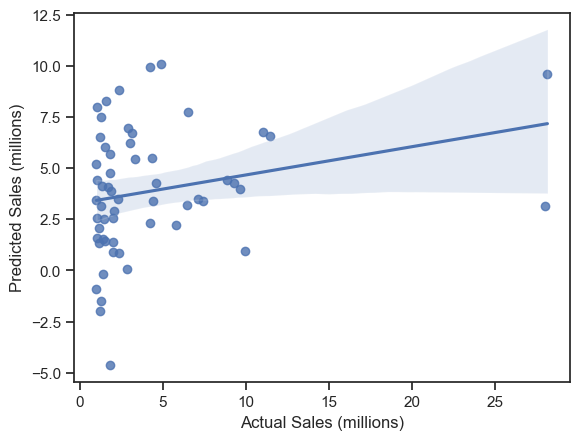

In [113]:
# Plot the actual values against the predicted values using the test data.
# The predictions are low and as the sales increase the uncertainty greatly increases.
ax = sns.regplot(x=y_test,y=predictions)
ax.set(xlabel='Actual Sales (millions)', ylabel='Predicted Sales (millions)')
plt.show()

## Scatterplot of predicted sales vs actual sales
The actual predictions are not a great fit, there is a great deal of uncertainty in the data as the sales increase towards 30 million. The distribution shown here is quite left skewed and potentially indicates that a linear model is not the best method for determining sales success.

In [39]:
# Dig into the linear model even more
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     3.364
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           2.25e-05
Time:                        01:14:59   Log-Likelihood:                -525.45
No. Observations:                 168   AIC:                             1089.
Df Residuals:                     149   BIC:                             1148.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Stats report
The R^2 value is 0.203, so 20.3% of the variation is explained by the model. This can be seen by the graph, there is a lot of variation and the model does not seem to be a great fit. A break down of the effect of the categorical features show that, in terms of millions of sales, the switch platform increases sales from the intercept by 3.528 million. This is the highest selling of all of the platforms. The genre predicted to be the highest selling is the racing genre with an increase over the intercept of 8.642 million. 

It is interesting the the user reviews seem to predict a negative relationship with sales, however the metacritic review scores predict a positive relationship. There were only 3 features that were significant or near significant predictors of sales, the genre being racing, the platform being the Nintendo Switch and the metacritic review score. 

In [40]:
# The model score is the final indicator that the model is not a very good fit. I expect this is likely a result of 
# the large number of categorical data.
model.score(X_test, y_test)

-0.04774441989620959

# Predicitng platform and genre
Knowing that the linear model had the racing genre and switch as a platform as predicting high sales, it would be interesting to see if the data can be looked at in the reverse direction. Are sales and/user or metacritic scores a good predictor of the genre or platform.

In [41]:
# Import the appropriate packages and functions 
import math
vals = data_merge['user_review'].astype(float) # set data type to float
data_merge = data_merge.reset_index(drop=True) # reset index or it produces an error when trying to change the
# column
data_merge.loc[:,'user_review'] = vals # change the column to the new float values

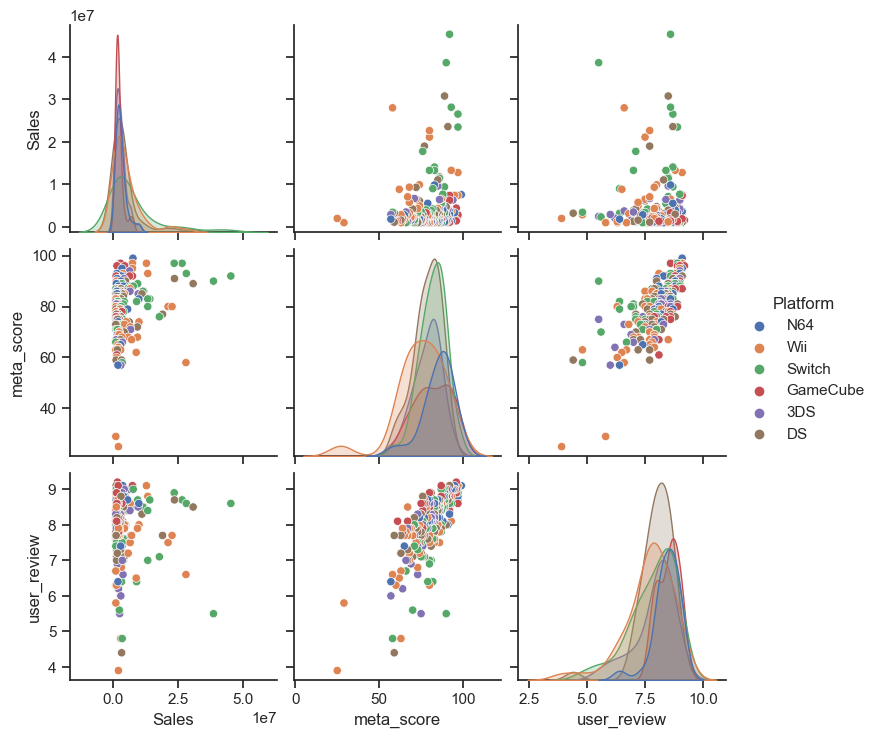

In [42]:
# Scatter matrix shows there is collinaerity in the variables and they are very clumped. This makes it
# very difficult to separate them for the analysis.
sns.set_theme(style="ticks") # set the theme
sns.pairplot(data_merge.loc[:,["Sales","meta_score","user_review","Platform"]], hue="Platform") # make a pairwise
# plot

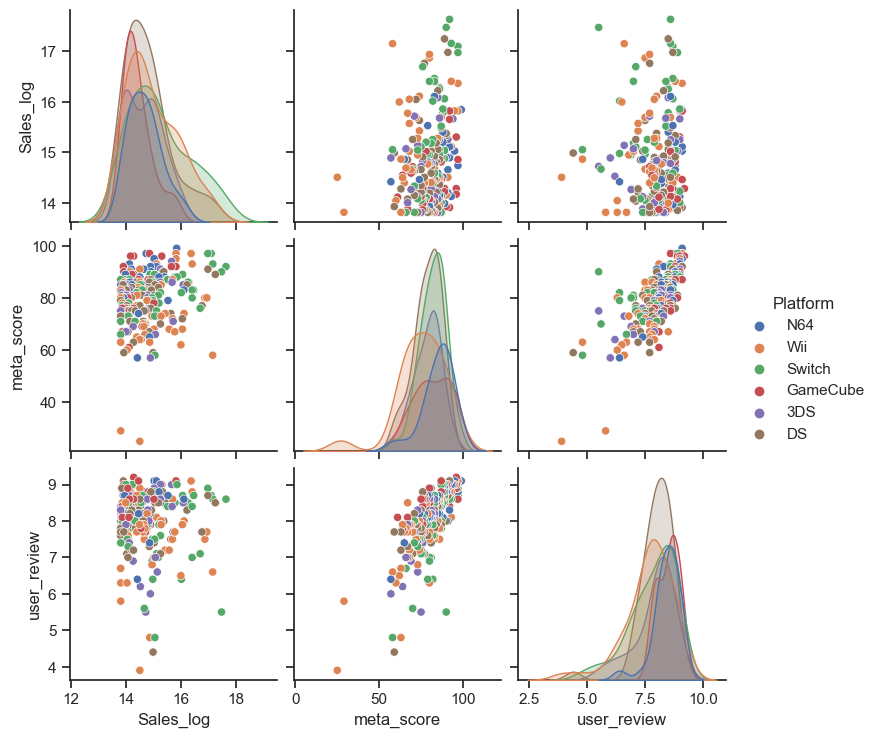

In [43]:
# Data are hard to separate so try looking at logs of the data, using the same method as before
# to change the column, but instead it makes a new column
log = data_merge['Sales'].apply(lambda x: math.log(x))
data_merge = data_merge.reset_index(drop=True) 
data_merge.loc[:,'Sales_log'] = log
sns.pairplot(data_merge.loc[:,["Sales_log","meta_score","user_review","Platform"]], hue="Platform") # plot this

# PCA
Trying the log of the data did separate them a little bit but it also appears that there is collinearity, especially between the two scoring metrics. So trying a PCA on the scoring metrics to make a single score PC.

In [44]:
# Import functions for PCA, pipelines and KNN analysis
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import GridSearchCV
from pandas import DataFrame
# Do PCA on the variables since they are not separable currently, use the PCA to then run knn on platform and genre

In [45]:
# Need to redefine x and y for the training and test sets
# Set sales, meta score and user reviews as X
X = data_merge[['meta_score', 'user_review', 'Sales_log']]
X.dtypes

meta_score       int64
user_review    float64
Sales_log      float64
dtype: object

In [46]:
# Make user reviews floats rather than objects
vals = X['user_review'].astype(float)
X = X.reset_index(drop=True) 
X.loc[:,'user_review'] = vals
X.dtypes

meta_score       int64
user_review    float64
Sales_log      float64
dtype: object

In [47]:
# Make meta scores out of ten like the user reviews
vals = X['meta_score']/10
X = X.reset_index(drop=True) 
X.loc[:,'meta_score'] = vals
X.dtypes

meta_score     float64
user_review    float64
Sales_log      float64
dtype: object

In [48]:
X_arr = np.array(X[['meta_score', 'user_review']])

In [49]:
data_merge['Genre'].unique()

array(['Action-adventure', 'Platformer', 'Shooter', 'Survival',
       'Fighting', 'Role-Playing Game', 'Sport', 'Racing', 'Sim',
       'Rhythm', 'Puzzle', 'Party'], dtype=object)

In [50]:
# Set the Y variables - platform and genre will be tested in this way
# Convert the Y variables to integers
data_merge.loc[data_merge['Platform'].str.contains('N64'), 'Platform'] = '0'
data_merge.loc[data_merge['Platform'].str.contains('GameBoyAdvanced'), 'Platform'] = '1'
data_merge.loc[data_merge['Platform'].str.contains('GameCube'), 'Platform'] = '2'
data_merge.loc[data_merge['Platform'].str.contains('DS'), 'Platform'] = '3'
data_merge.loc[data_merge['Platform'].str.contains('Wii'), 'Platform'] = '4'
data_merge.loc[data_merge['Platform'].str.contains('3DS'), 'Platform'] = '5'
data_merge.loc[data_merge['Platform'].str.contains('Wii U'), 'Platform'] = '6'
data_merge.loc[data_merge['Platform'].str.contains('Switch'), 'Platform'] = '7'

In [51]:
# Convert the Genres to numbers too
data_merge.loc[data_merge['Genre'].str.contains('Action-adventure'), 'Genre'] = '0'
data_merge.loc[data_merge['Genre'].str.contains('Platformer'), 'Genre'] = '1'
data_merge.loc[data_merge['Genre'].str.contains('Shooter'), 'Genre'] = '2'
data_merge.loc[data_merge['Genre'].str.contains('Survival'), 'Genre'] = '3'
data_merge.loc[data_merge['Genre'].str.contains('Fighting'), 'Genre'] = '4'
data_merge.loc[data_merge['Genre'].str.contains('Role-Playing Game'), 'Genre'] = '5'
data_merge.loc[data_merge['Genre'].str.contains('Sport'), 'Genre'] = '6'
data_merge.loc[data_merge['Genre'].str.contains('Racing'), 'Genre'] = '7'
data_merge.loc[data_merge['Genre'].str.contains('Sim'), 'Genre'] = '8'
data_merge.loc[data_merge['Genre'].str.contains('Rhythm'), 'Genre'] = '9'
data_merge.loc[data_merge['Genre'].str.contains('Puzzle'), 'Genre'] = '10'
data_merge.loc[data_merge['Genre'].str.contains('Party'), 'Genre'] = '11'

In [52]:
# Create the Y variables by setting the columns as numerics and creating new variables,
# one for Platform and one for Genre.
data_merge['Platform'] = pd.to_numeric(data_merge['Platform'])
Y = data_merge['Platform']
data_merge['Genre'] = pd.to_numeric(data_merge['Genre'])
Y1 = data_merge['Genre']

In [53]:
# Make PCA pipeline 
pca = make_pipeline(

    PCA(n_components=2)
)
pca

Pipeline(steps=[('pca', PCA(n_components=2))])

In [54]:
# Apply pca to the collinear review scores, then drop the original review scores from the data
# Use the array created previously called X_arr, as this prevents errors with passing a column to the pca function.
X_pca_sales = X[['Sales_log']]
X_pca = pca.fit(X_arr).transform(X_arr)
X_pca = pd.DataFrame(X_pca, columns =['PC1','PC2'])
X_pca_sales[['PC1']] = X_pca[['PC1']] # Subset to only the first component as the knn can only be graphically
# displayed using two componenet, the sales data and the first PC which will capture most of the variation of the 
# two review scores
X_pca_sales

,Sales_log,PC1
0,15.843659,-2.210749
1,16.364956,-2.053118
2,15.818341,-2.053118
3,17.094540,-1.806928
4,14.739769,-1.868476
...,...,...
220,17.148429,2.559380
221,14.890513,3.007480
222,14.419827,2.761290
223,13.815511,5.337414


In [55]:
# test and train split the pca dataframe and set hyperparameter optimisation range.
# Use the X_pca_sales as X to be split which is only the sales data and the PC1 calculated previously.
X_train, X_test, y_train, y_test = train_test_split(X_pca_sales, Y, random_state=42)
model = KNeighborsClassifier()

# Set hyperparameter optimisation range to test k values between 1 and 60
parameters = {
    "n_neighbors" : range(1, 60),
}

In [56]:
#Run grid search to find best value of k
clf = GridSearchCV(model, parameters).fit(X_train, y_train)

In [57]:
# Check the results of the grid search
cv_results = DataFrame(clf.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
6,7,0.357754,0.060179,1
5,6,0.351872,0.064187,2
44,45,0.350980,0.017971,3
42,43,0.345098,0.009606,4
46,47,0.345098,0.009606,4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

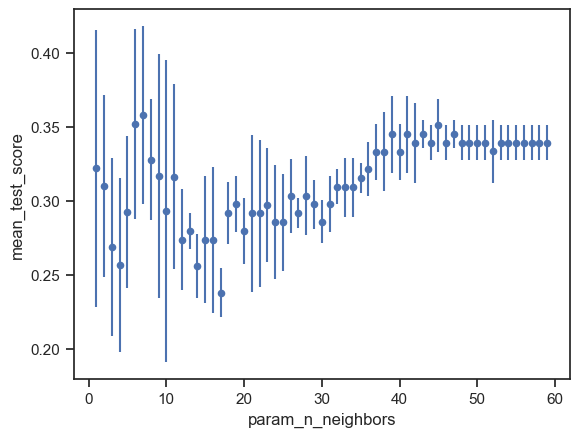

In [58]:
# Visualise the distribution of k values tried. 7 is the highest scoring, though the test score
# is relatively low at 0.358
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

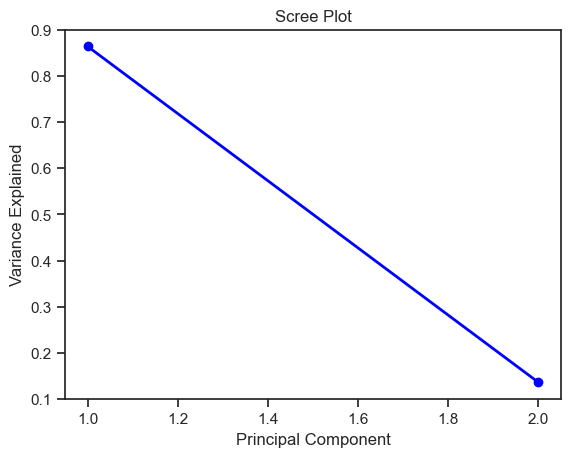

In [59]:
# Scree plot to show cumulative variance explained by PCs
# First PC is explaining over 86% variation by itself
PC_values = np.arange(pca["pca"].n_components_) + 1
plt.plot(PC_values, pca["pca"].explained_variance_ratio_, 'o-', linewidth = 2, color = "blue")
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [60]:
# Exact values of the PCs
pca["pca"].explained_variance_ratio_

array([0.86401664, 0.13598336])

In [61]:
# The first principal component is principal componenet is strongly, negatively correlated with the meta 
# and user scores.
loadings = pd.DataFrame(pca["pca"].components_.T, columns=['PC1', 'PC2'], index= X[['meta_score','user_review']].columns)
loadings

,PC1,PC2
meta_score,-0.788157,0.615475
user_review,-0.615475,-0.788157


In [62]:
# Import additional functions
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl

In [63]:
# Split test and training data again, same as before and fit the model with the new best
# k value of 7
X_train, X_test, y_train, y_test = train_test_split(X_pca_sales, Y, random_state=42)
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3157894736842105

In [64]:
# Function for plotting the knn analysis. A grid mesh is created and then filled in
# with the colour corresponding to the classification that the model has made.
# A legend for the colours is produced.
def plot_knn(model, X, y, resolution=100, ax=None):
    
    red = '#d73027'
    orange = '#fc8d59'
    blue = '#4575b4'
    yellow = '#f2e81e'
    green = '#50e01a'
    black = '#000000'
    lightblue = '#22f5ef'
    purple = '#d222f5'
    pink = '#ec0cb2'
    burgandy = '#a81651'
    deeppurple = '#4709bc'
    dirtygold = '#928321'
    colormap = np.array([red, blue, orange, yellow, green, black, lightblue, purple])
    
    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap=mpl.colors.LinearSegmentedColormap.from_list("",[red, blue, orange, yellow, green, black, lightblue, purple]), alpha=0.5, shading="auto")
    X.plot.scatter(0, 1, c=colormap[y], colorbar=False, alpha=0.8, ax=ax)
    legend_class = []
    for Genre, color in zip(['Nintendo 64', 'Game Boy Advanced', 'GameCube', 'Nintendo DS', 'Nintendo Wii', 'Nintendo 3DS', 'Nintendo Wii U', 'Nintendo Switch'], [red, blue, orange, yellow, green, black, lightblue, purple]):
        legend_class.append(Line2D([0], [0], marker='o', label=Genre,ls='None',
                               markerfacecolor=color, 
                               markeredgecolor='k', markeredgewidth=0.7))
    ax.legend(handles=legend_class, loc='center', 
                    bbox_to_anchor=(1.2, 0.4),
                    frameon=False, title='Platform')

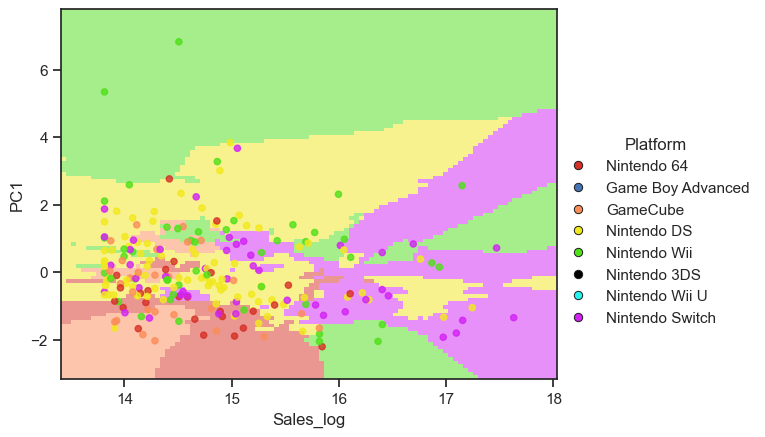

In [65]:
# Use function to plot knn analysis for the platform
plot_knn(model, X_pca_sales, Y)

## Classification analysis of Genre

In [66]:
# Repeat steps as before. Split X and Y to test and train.
X_train, X_test, y_train, y_test = train_test_split(X_pca_sales, Y1, random_state=42)

model = KNeighborsClassifier()

#Hyperparameter range for optimisation testing
parameters = {
    "n_neighbors" : range(1, 60),
}

In [67]:
# Fit model with the training data
clf = GridSearchCV(model, parameters).fit(X_train, y_train)

In [68]:
# Check the results
cv_results = DataFrame(clf.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
12,13,0.232086,0.021291,1
13,14,0.226381,0.025578,2
11,12,0.226203,0.049110,3
58,59,0.226025,0.076530,4
10,11,0.220499,0.056336,5


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

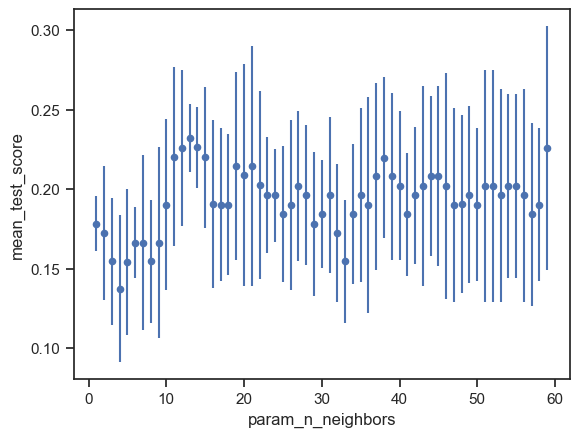

In [69]:
# Visualise the distribution of k values tried. 13 is the highest scoring, though the test score
# is relatively low at 0.232
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

Principal components are the same as those calculated previously, the only thing that has changed is the Y variable. So no scree plot, cumulative variance breakdown or loadings are necessary as they have not changed.

In [70]:
# Use optimal k value to make new fitted knn model.
X_train, X_test, y_train, y_test = train_test_split(X_pca_sales, Y1, random_state=42)
model = KNeighborsClassifier(n_neighbors = 13)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22807017543859648

In [71]:
# Redefine the function previously to have an updated legend and more colours for the increased amount of 
# categories.
def plot_knn(model, X, y, resolution=100, ax=None):
    
    red = '#d73027'
    orange = '#fc8d59'
    blue = '#4575b4'
    yellow = '#f2e81e'
    green = '#50e01a'
    black = '#000000'
    lightblue = '#22f5ef'
    purple = '#d222f5'
    pink = '#ec0cb2'
    burgandy = '#a81651'
    deeppurple = '#4709bc'
    dirtygold = '#928321'
    colormap = np.array([red, blue, orange, yellow, green, black, lightblue, purple, pink, burgandy, deeppurple, dirtygold])
    
    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap=mpl.colors.LinearSegmentedColormap.from_list("",[red, blue, orange, yellow, green, black, lightblue, purple, pink, burgandy, deeppurple, dirtygold]), alpha=0.5, shading="auto")
    X.plot.scatter(0, 1, c=colormap[y], colorbar=False, alpha=0.8, ax=ax)
    legend_class = []
    for Genre, color in zip(['Action Adventure', 'Platformer', 'Shooter', 'Survival', 'Fighting', 'Role-Playing Game', 'Sport', 'Racing', 'Sim', 'Rhythm', 'Puzzle', 'Party'], [red, blue, orange, yellow, green, black, lightblue, purple, pink, burgandy, deeppurple, dirtygold]):
        legend_class.append(Line2D([0], [0], marker='o', label=Genre,ls='None',
                               markerfacecolor=color, 
                               markeredgecolor='k', markeredgewidth=0.7))
    ax.legend(handles=legend_class, loc='center', 
                    bbox_to_anchor=(1.2, 0.4),
                    frameon=False, title='Genre')

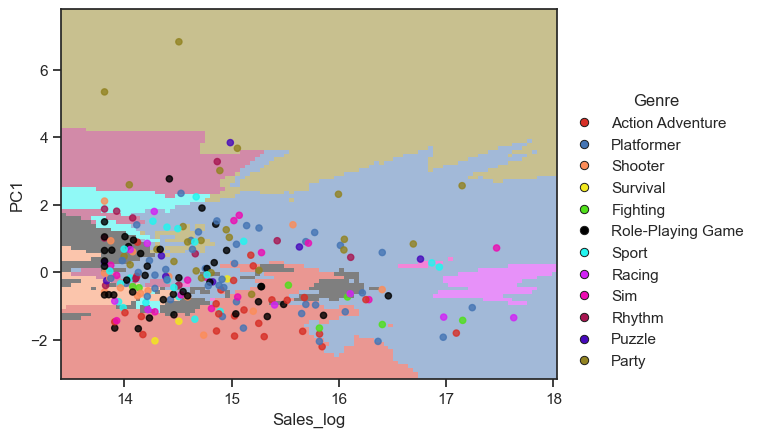

In [72]:
# Plot the results
plot_knn(model, X_pca_sales, Y1)

# Conclusion
To conclude the analysis for the sales and review score classifications, the first thing to note is that the models are not actually great fits. The data is too clustered to be properly separated. A larger sample size could potentially fix this, if there was more data to hand. That being said, the analysis did reveal a few things, firstly looking at the platform, the wii and the nintendo switch and the DS occupied the right half of the knn plot. Thus they had the greatest sales. But their position along the axis suggests that, because the PC was negatively correlated with the review scores, worse reviewed games on the wii sold better whereas better reviewed games on the switch sold better. There is therefore, a possibilty of a platform dependent interaction between sales and review scores. This could simply be due to time as the nintendo switch has released over 10 years after the wii, maybe something has changed about how consumers decide what games to purchase in this time.

As for the genre, party games occupy the top half of the graph suggesting they are the worst reviewed game genre. This is likely due to the quick shovelware mentality of developers who make such party games. Lots of small cheap games with little substance or cohesion are put into a compilation party game to satisfy a consumer need to be able to use their entertainment device i.e. console, to entertain the guests they are hosting. It is unsurprising then, given the niche they occupy, that the party game genre spreads across the range of sales. Some sell incredibly well. On the other end, platformer and racing games sell well and are very well recieved critically. Action-adventure games do not sell as well only reaching the middle of the sales range but appear to be the most critically acclaimed genre with game franchises like the Legend of Zelda, this is understandable. Interestingly, shooters on nintendo platforms, seems to sell the least well - likely because they are cross-platform games releasing on sony and microsoft consoles where they are more popular.